In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
song_data = pd.read_csv('final_data.csv')
song_data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Count
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,69958
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,94570
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,45706
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),87806
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,4228


In [ ]:
song_data.isnull().sum()

song_name           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
Count               0
dtype: int64

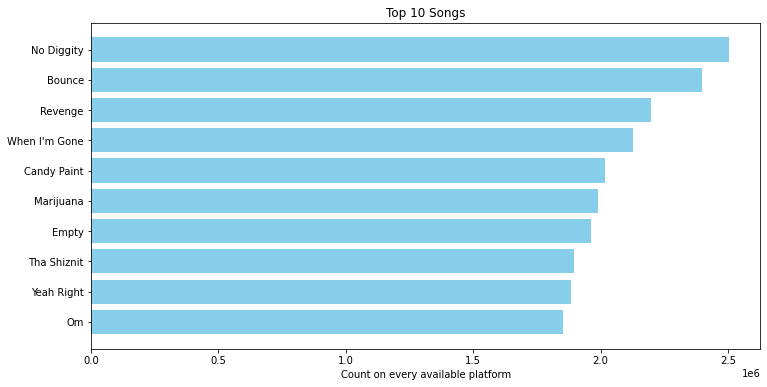

In [ ]:
#Getting the top most Popular Songs
def plot():
    popularity = song_data.sort_values("Count", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["song_name"].head(10), popularity["Count"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 Songs")
    plt.xlabel("Count on every available platform")
    plt.show()
plot()

In [ ]:
# function to recommend new songs
def Music_Recommendation(song_name, k):
  # to convert dataframe into array
  song_list = (song_data['song_name']).to_list() 
  # to check if song selected by user is available?
  if song_name in song_list :
    print("Song "+"'"+song_name+"'"+" is available")
    song_index = (song_list.index(song_name))
    # total listen count of the song which is selected by user
    song_listen_count = (song_data['tempo'].iloc[song_index])
    song_listen_energy = (song_data['energy'].iloc[song_index])
    new_distance_list = []
    for i in range(len(song_data)):
      if i != song_index :
        # calculate manhattan distance
        abs_distance = abs((song_listen_count - song_data['tempo'][i])+(song_listen_energy - song_data['energy'][i]))
        new_distance_list.append([abs_distance,song_data['song_name'][i]])
    # to sort distance list by ascending order     
    new_distance_list = sorted(new_distance_list)
    print("Top " + str(k) + " Recommendation for you.......")
    for i in range(k):
      print(i+1,")",new_distance_list[i][1])
  else:
     print("Song "+"'"+song_name+"'"+" is not available")
     print("Top " + str(k) + " Recommendation for you.......")
     recommend_song = song_data[['song']].head(k)
     for i in range(k):
      print(i+1,")",recommend_song['song'][i])
k = 10
song = input("Input song:")
Music_Recommendation(song, k)

Input song:LTE
Song 'LTE' is available
Top 10 Recommendation for you.......
1 ) Lockdown
2 ) Drugs
3 ) Shattered Amethyst
4 ) Cold Turkey
5 ) Super Saiyan
6 ) Phoenix
7 ) Antidote
8 ) Poppin' Them Thangs
9 ) HEAD GXNE
10 ) Her
